In [1]:
import pandas as pd
import numpy as np

import glob

In [31]:
# absolute path to search all text files inside a specific folder
path = r'raw_data/*.csv'
files = glob.glob(path)
all_countries=list()
for file in files:
    raw_data = pd.read_csv(file)
    all_countries.extend(x for x in raw_data.name if x not in all_countries) 
    
db = pd.DataFrame({"country":all_countries})
for file in files:
    value_name = file.title().split("\\")[1].split(".")[0].replace(" ","_")
    raw_data = pd.read_csv(file)
    db = db.merge(raw_data
                  #,how='left'   #removed to get rid of countries that doesn't have some of
                  ,left_on="country",right_on="name")
    db = db.drop(columns=["name","region","ranking","slug","date_of_information"])
    db = db.rename(columns={"value": value_name})
db

,country,Area,Birth_Rate,Death_Rate,Net_Migration_Rate,Population_Growth_Rate,Population
0,Russia,"17,098,242",9.45,13.36,1.70,-0.22,"142,021,981"
1,Antarctica,"14,200,000",NaN,NaN,NaN,NaN,NaN
2,Canada,"9,984,670",10.17,8.12,5.46,0.75,"38,232,593"
3,United States,"9,833,517",12.28,8.38,3.02,0.69,"337,341,954"
4,China,"9,596,960",9.93,7.90,-0.11,0.19,"1,410,539,758"
...,...,...,...,...,...,...,...
252,Johnston Atoll,3,NaN,NaN,NaN,NaN,NaN
253,Monaco,2,6.66,10.70,10.03,0.60,"31,400"
254,Howland Island,2,NaN,NaN,NaN,NaN,NaN
255,Kingman Reef,1,NaN,NaN,NaN,NaN,NaN


In [43]:
db.describe()

,Area,Birth_Rate,Death_Rate,Net_Migration_Rate,Population_Growth_Rate
count,2.570000e+02,228.000000,229.000000,231.000000,237.000000
mean,5.859964e+05,17.738772,7.506900,-0.489740,0.945865
std,1.899149e+06,8.944211,2.630275,6.129024,1.124932
min,0.000000e+00,6.470000,1.420000,-29.800000,-2.390000
25%,5.720000e+02,10.937500,5.720000,-2.555000,0.230000
50%,5.110000e+04,15.185000,7.130000,-0.290000,0.780000
75%,3.420000e+05,22.257500,9.070000,1.515000,1.630000
max,1.709824e+07,47.080000,16.390000,40.580000,5.910000


In [38]:
# Convert the following column to integers
db.Area = pd.to_numeric(db.Area.str.replace(",",""))
db.Population = pd.to_numeric(db.Population.str.replace(",",""))

In [46]:
db.describe()

,Area,Birth_Rate,Death_Rate,Net_Migration_Rate,Population_Growth_Rate,Population
count,2.570000e+02,228.000000,229.000000,231.000000,237.000000,2.370000e+02
mean,5.859964e+05,17.738772,7.506900,-0.489740,0.945865,3.335592e+07
std,1.899149e+06,8.944211,2.630275,6.129024,1.124932,1.341749e+08
min,0.000000e+00,6.470000,1.420000,-29.800000,-2.390000,5.000000e+01
25%,5.720000e+02,10.937500,5.720000,-2.555000,0.230000,3.556080e+05
50%,5.110000e+04,15.185000,7.130000,-0.290000,0.780000,5.454533e+06
75%,3.420000e+05,22.257500,9.070000,1.515000,1.630000,2.156380e+07
max,1.709824e+07,47.080000,16.390000,40.580000,5.910000,1.410540e+09


In [50]:
# its safe to replace NaN in Birth_rate and Death_Rate and population with 0 as:
#   it won't impact the analysis negatively and
#   its easy to recognize it since no country has such value
db.Population = db.Population.fillna(0)
db.Birth_Rate = db.Birth_Rate.fillna(0)
db.Death_Rate = db.Death_Rate.fillna(0)

In [51]:
db.describe()

,Area,Birth_Rate,Death_Rate,Net_Migration_Rate,Population_Growth_Rate,Population
count,2.570000e+02,257.000000,257.000000,231.000000,237.000000,2.570000e+02
mean,5.859964e+05,15.737121,6.689027,-0.489740,0.945865,3.076013e+07
std,1.899149e+06,10.127182,3.413765,6.129024,1.124932,1.291379e+08
min,0.000000e+00,0.000000,0.000000,-29.800000,-2.390000,0.000000e+00
25%,5.720000e+02,9.450000,5.080000,-2.555000,0.230000,1.021460e+05
50%,5.110000e+04,13.930000,6.730000,-0.290000,0.780000,4.161925e+06
75%,3.420000e+05,21.120000,8.820000,1.515000,1.630000,1.851990e+07
max,1.709824e+07,47.080000,16.390000,40.580000,5.910000,1.410540e+09


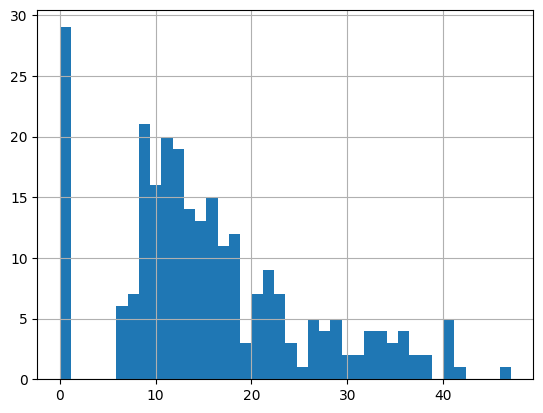

In [63]:
db.Birth_Rate.hist(bins=40);

In [54]:
# Since the Population_Growth_Rate and Net_Migration_Rate is distributed around the Zero and since some country has already Zero as value, 
# its more safe not to replace NaN with 0
sum(db.Population_Growth_Rate == 0.0)

2

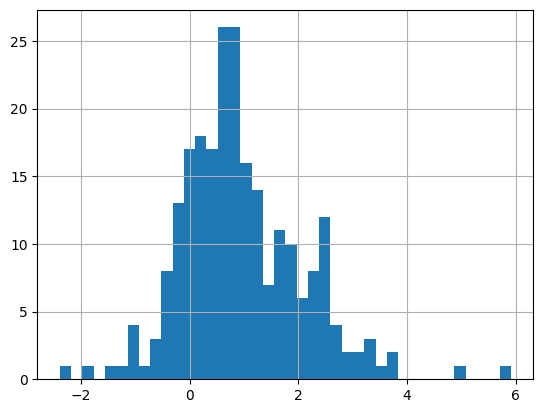

In [59]:
db.Population_Growth_Rate.hist(bins=40);

In [55]:
sum(db.Net_Migration_Rate == 0.0)

17

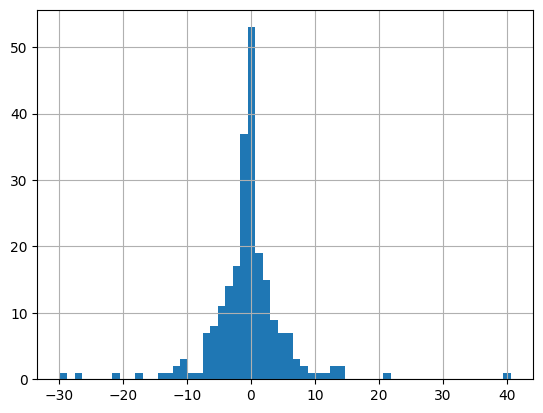

In [62]:
db.Net_Migration_Rate.hist(bins=60);